In [1]:
using Revise
using Pkg
Pkg.activate("../.")
using Luxor
using Colors
using ColorSchemes
using Thebes
using MathTeXEngine
using LaTeXStrings

  Activating project at `~/MEGA/EMAp/JPlots.jl`
┌ Warning: Package Luxor does not have MathTeXEngine in its dependencies:
│ - If you have Luxor checked out for development and have
│   added MathTeXEngine as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Luxor
│ Loading MathTeXEngine into Luxor from project dependency, future warnings for Luxor are suppressed.
└ @ nothing nothing:984


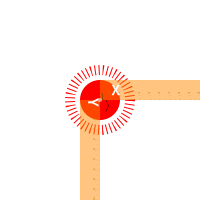

In [2]:
d = Drawing(200,200,:svg)
origin()
sethue(colorant"#FF0000")
circle(O,20,:fill)

setdash("dot")
setline(10)
sethue(colorant"#FF0000")
circle(O,30,:stroke)
sethue("black")
text(L"1\rangle",)
rulers()
finish()
d

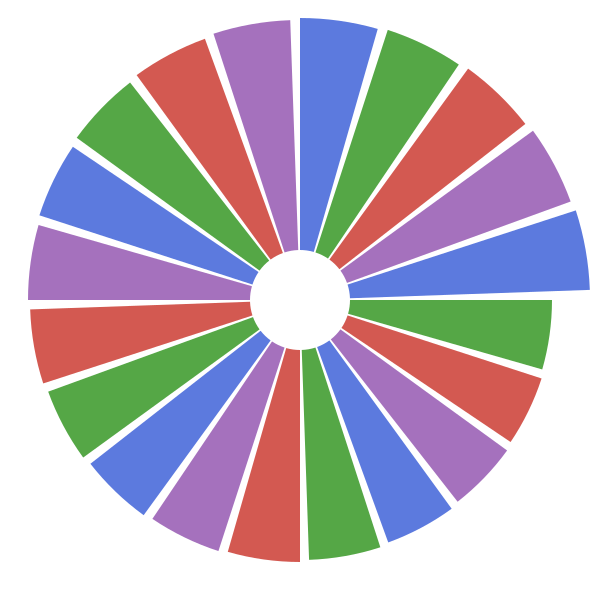

In [3]:
@draw begin
    setopacity(0.85)
    steps = 20
    gap   = 2
    for (n, θ) in enumerate(range(0, step=2π/steps, length=steps))
        sethue([Luxor.julia_green,
            Luxor.julia_red,
            Luxor.julia_purple,
            Luxor.julia_blue][mod1(n, 4)])
        sector(Point(0, 0), 50, 250 + 2n, θ, θ + 2π/steps - deg2rad(gap), :fill)
    end
end

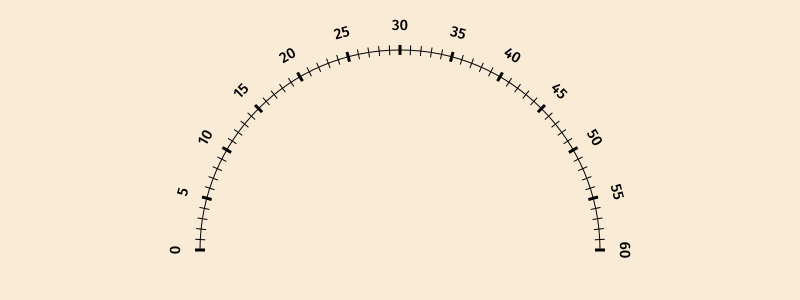

In [4]:
@drawsvg begin
    background("antiquewhite")
    _counter() = (a = -1; () -> a += 1)
    counter = _counter() # closure
    fontsize(15)
    arrow(O +  (0, 100), 200, π, 2π,
        arrowheadlength=0,
        decoration=range(0, 1, length=61),
        decorate = () -> begin
                d = counter()
                if d % 5 == 0
                    text(string(d), O + (0, -20), halign=:center)
                    setline(3)
                end
                line(O - (0, 5), O + (0, 5), :stroke)
            end
        )
end 800 300

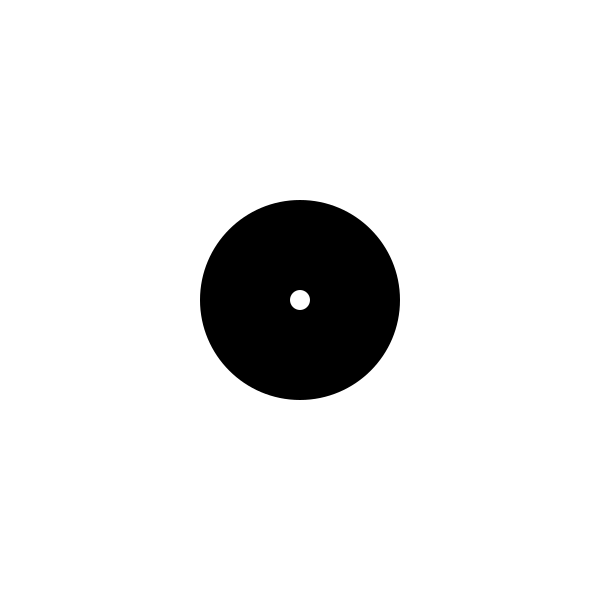

In [5]:
@drawsvg begin
    setline(4)
    pos = O
    circlepath(pos, 100, :path)
    newsubpath()
    circlepath(pos, 10, :fill, reversepath=true)
end

In [6]:
d = Drawing(500,500,:svg)
setopacity(0.85)
steps = 20
gap   = 2
for (n, θ) in enumerate(range(0, step=2π/steps, length=steps))
    sethue([Luxor.julia_green,
        Luxor.julia_red,
        Luxor.julia_purple,
        Luxor.julia_blue][mod1(n, 4)])
    sector(Point(0, 0), 50, 250 + 2n, θ, θ + 2π/steps - deg2rad(gap), :fill)
end
finish()
d2 = Drawing(500,500, :svg)
origin()
rulers()
rotate(-π/2)
placeimage(d)
finish()

function savesvg(d::Drawing, file="myfig.svg")
    fig = Drawing(d.width,d.height, file)
        placeimage(d)
    finish()
end

function rawsvg(d::Drawing)
    return String(copy(d.bufferdata))
end
savesvg(d)
# findfirst("\n",rawsvg(d))[1]
dsvg = rawsvg(d)[40:end]
mm = println(dsvg)

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="500pt" height="500pt" viewBox="0 0 500 500" version="1.1">
<g id="surface17">
<path style=" stroke:none;fill-rule:nonzero;fill:rgb(22%,59.6%,14.9%);fill-opacity:0.85;" d="M 50 0 L 252 0 C 252 23.496094 248.714844 46.875 242.238281 69.460938 L 48.0625 13.78125 C 49.347656 9.300781 50 4.660156 50 0 Z M 50 0 "/>
<path style=" stroke:none;fill-rule:nonzero;fill:rgb(79.6%,23.5%,20%);fill-opacity:0.85;" d="M 47.554688 15.449219 L 241.566406 78.492188 C 234.25 101.011719 223.816406 122.402344 210.574219 142.035156 L 41.453125 27.960938 C 44.058594 24.09375 46.113281 19.882812 47.554688 15.449219 Z M 47.554688 15.449219 "/>
<path style=" stroke:none;fill-rule:nonzero;fill:rgb(58.4%,34.5%,69.8%);fill-opacity:0.85;" d="M 40.449219 29.390625 L 207.109375 150.472656 C 193.078125 169.78125 176.417969 187.035156 157.609375 201.730469 L 30.78125 39.402344 C 34.457031 36.53125 37.710938 33.160156 40.449219 29.390

In [7]:
using HypertextLiteral
@htl """
function findObjectCoords(mouseEvent)
{
  var obj = document.getElementById("objectBox");
  var obj_left = 0;
  var obj_top = 0;
  var xpos;
  var ypos;
  while (obj.offsetParent)
  {
    obj_left += obj.offsetLeft;
    obj_top += obj.offsetTop;
    obj = obj.offsetParent;
  }
  if (mouseEvent)
  {
    //FireFox
    xpos = mouseEvent.pageX;
    ypos = mouseEvent.pageY;
  }
  else
  {
    //IE
    xpos = window.event.x + document.body.scrollLeft - 2;
    ypos = window.event.y + document.body.scrollTop - 2;
  }
  xpos -= obj_left;
  ypos -= obj_top;
  document.getElementById("objectCoords").innerHTML = xpos + ", " + ypos;
}
document.getElementById("objectBox").onmousemove = findObjectCoords;
"""
# @htl "$([x for x in 1:3]...)"
myhtml =  """
<html>
<script src="https://cdn.jsdelivr.net/npm/@svgdotjs/svg.js@3.0/dist/svg.min.js"></script>
<body>
<h1>Exercício 2 - Visualizações</h1>
$dsvg
</body>
</html>
"""
HTML(myhtml)

HTML{String}("<html>\n<script src=\"https://cdn.jsdelivr.net/npm/@svgdotjs/svg.js@3.0/dist/svg.min.js\"></script>\n<body>\n<h1>Exercício 2 - Visualizações</h1>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"500pt\" height=\"500pt\" viewBox=\"0 0 500 500\" version=\"1.1\">\n<g id=\"surface17\">\n<path style=\" stroke:none;fill-rule:nonzero;fill:rgb(22%,59.6%,14.9%);fill-opacity:0.85;\" d=\"M 50 0 L 252 0 C 252 23.496094 248.714844 46.875 242.238281 69.460938 L 48.0625 13.78125 C 49.347656 9.300781 50 4.660156 50 0 Z M 50 0 \"/>\n<path style=\" stroke:none;fill-rule:nonzero;fill:rgb(79.6%,23.5%,20%);fill-opacity:0.85;\" d=\"M 47.554688 15.449219 L 241.566406 78.492188 C 234.25 101.011719 223.816406 122.402344 210.574219 142.035156 L 41.453125 27.960938 C 44.058594 24.09375 46.113281 19.882812 47.554688 15.449219 Z M 47.554688 15.449219 \"/>\n<path style=\" stroke:none;fill-rule:nonzero;fill:rgb(58.4%,34.5%,69.8%);fill-opacity:0.85;\" d=\"M 40.449219 29.390625 L 207.109375 150.472656 C 193.078125 169.78125 176.417969 187.035156 157.609375 201.730469 L 30.78125 39.402344 C 34.457031 36.53125 37.710938 33.160156 40.449219 29.390625 Z M 40.449219 29.390625 \"/>\n<path style=\" stroke:none;fill-rule:nonzero;fill:rgb(25.1%,38.8%,84.7%);fill-opacity:0.85;\" d=\"M 29.390625 40.449219 L 151.648438 208.726562 C 132.1875 222.867188 110.84375 234.214844 88.242188 242.441406 L 17.101562 46.984375 C 21.480469 45.390625 25.617188 43.191406 29.390625 40.449219 Z M 29.390625 40.449219 \"/>\n<path style=\" stroke:none;fill-rule:nonzero;fill:rgb(22%,59.6%,14.9%);fill-opacity:0.85;\" d=\"M 15.449219 47.554688 L 80.34375 247.273438 C 57.289062 254.765625 33.300781 258.996094 9.074219 259.839844 L 1.746094 49.96875 C 6.402344 49.808594 11.015625 48.992188 15.449219 47.554688 Z M 15.449219 47.554688 \"/>\n</g>\n</svg>\n\n</body>\n</html>\n")

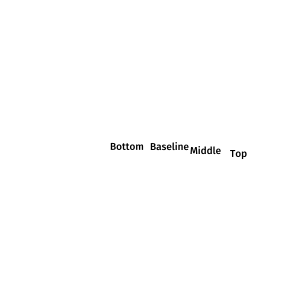

In [8]:
d = Drawing(300,300,:svg)
origin()
text("Baseline", valign=:baseline)
translate(40,0)
text("Middle", valign=:middle)
translate(40,0)
text("Top", valign=:top)
translate(-120,0)
text("Bottom", valign=:bottom)
finish()
d

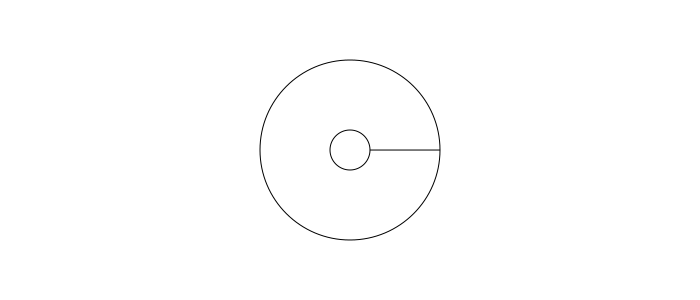

In [9]:
d = Drawing(700, 300, :svg)
rₘᵢₙ = 20
rₘₐₓ = 90
θₘᵢₙ = 0
θₘₐₓ = 4π/2
origin()
setline(1)
sector(rₘᵢₙ, rₘₐₓ,  -θₘₐₓ, θₘᵢₙ, action=:stroke)
finish()
d

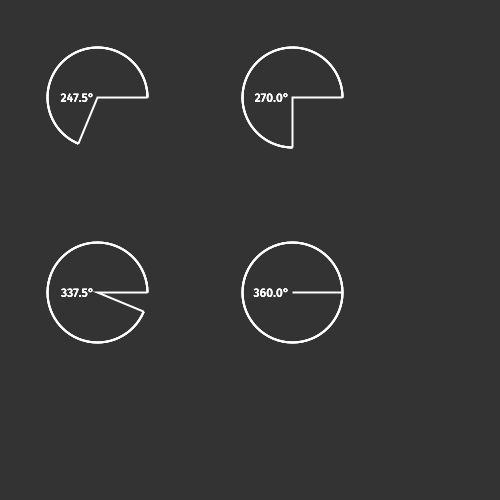

In [10]:
function showangle(pt1, pt2, pt3)
    θ = anglethreepoints(pt1, pt2, pt3)
    label(string(round(rad2deg(θ), digits=2), "°"), :w, pt2)
    newpath()
    carc(pt2, 50, 0, -θ)
    strokepath()
end
d = Drawing(500, 500, :svg)
background("grey20")
sethue("white")
fontsize(12)
tiles = Tiler(800, 800, 4, 4)
for (pos, n) in tiles
    @layer begin
        translate(pos)
        pg = [polar(50, 0), O, polar(50, n * -2π/16)]
        poly(pg, :stroke)
        for n in 1:3
            pt1 = pg[1]
            pt2 = pg[2]
            pt3 = pg[3]
            showangle(pt1, pt2, pt3)
        end
    end
end
finish()
d

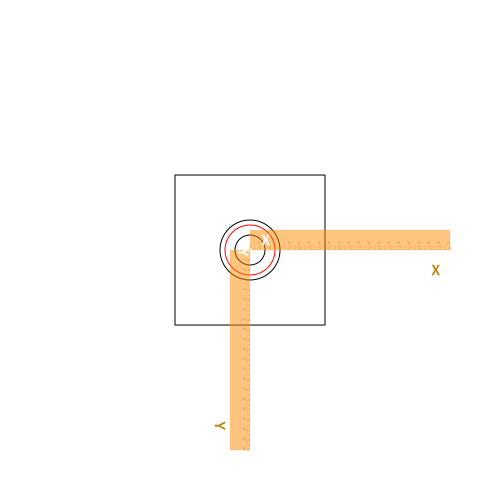

In [40]:
d1 = Drawing(300,300, :svg)
box(Point(0,300), Point(300,0),:stroke)

origin()
circle(O,60,:stroke)
sethue("red")
circle(O,50,:stroke)
sethue("black")
circle(O,30,:stroke)
finish()

d = Drawing(500,500, :svg)
origin()
@layer begin
    scale(0.5)
    rotate(-π/2)
    placeimage(d1, centered=true)
end
rulers()
finish()
d